In [2]:
import torch.linalg as LA
import numpy as np
import os
import torchvision.transforms as T
from torchvision.io import read_image
from torchvision.io.image import ImageReadMode
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [3]:
import argparse
args = argparse.ArgumentParser()
args.parse_args("")
args.image_size = 64
args.resolution_ratio = 4


In [6]:
path_lr = "../testdata/Testing_v2_fixeddata/Image_test_lowers"
path_gen = "../testdata/Testing_v2_fixeddata/Image_test_generated"
path_hr = "../testdata/Testing_v2_fixeddata/Image_test_truth"

n_example_imgs = 1999
files = sorted(os.listdir(path_lr))
files_hr = sorted(os.listdir(path_hr))
files_gen = sorted(os.listdir(path_gen))

first_file = files[0]
path =  os.path.join(path_lr, first_file)
images_lr = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)

first_file = files_hr[0]
path =  os.path.join(path_hr, first_file)
images_hr = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)

first_file = files_gen[0]
path =  os.path.join(path_gen, first_file)
images_gen = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)

for i in range(n_example_imgs):
    file = files[i + 1]
    print(file)
    path =  os.path.join(path_lr, file)
    img = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)
    images_lr = torch.cat([images_lr, img], dim=0)
    
    file = files_hr[i + 1]
    print(file)
    path =  os.path.join(path_hr, file)
    img = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)
    images_hr = torch.cat([images_hr, img], dim=0)
    
    file = files_gen[i + 1]
    print(file)
    path =  os.path.join(path_gen, file)
    img = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)
    images_gen = torch.cat([images_gen, img], dim=0)
    
   
norm = 255 / 2.0
transform_lr = T.Compose([
    T.CenterCrop((args.image_size // args.resolution_ratio, args.image_size // args.resolution_ratio)),
    T.Normalize((norm, norm, norm), (norm, norm, norm))
    ])
images_lr_save = images_lr
images_lr = transform_lr(images_lr.float())

transform_hr = T.Compose([
    T.CenterCrop((args.image_size , args.image_size)),
    T.Normalize((norm, norm, norm), (norm, norm, norm))
    ])

images_hr_save = images_hr
images_hr = transform_hr(images_hr.float())

images_gen_save = images_gen
images_gen = transform_hr(images_gen.float())

images_bicubic = F.interpolate(images_lr.float(), size = [images_hr.shape[-1], images_hr.shape[-2]], mode = "bicubic")
images_bicubic = images_bicubic.clamp(-1, 1)
images_bicubic_save =  (images_bicubic + 1) / 2.0 * 255
images_bicubic_save = images_bicubic_save.type(torch.uint8)

1000_test_lowres.jpg
1000_test_truth.jpg
1000_test_generated.jpg
1001_test_lowres.jpg
1001_test_truth.jpg
1001_test_generated.jpg
1002_test_lowres.jpg
1002_test_truth.jpg
1002_test_generated.jpg
1003_test_lowres.jpg
1003_test_truth.jpg
1003_test_generated.jpg
1004_test_lowres.jpg
1004_test_truth.jpg
1004_test_generated.jpg
1005_test_lowres.jpg
1005_test_truth.jpg
1005_test_generated.jpg
1006_test_lowres.jpg
1006_test_truth.jpg
1006_test_generated.jpg
1007_test_lowres.jpg
1007_test_truth.jpg
1007_test_generated.jpg
1008_test_lowres.jpg
1008_test_truth.jpg
1008_test_generated.jpg
1009_test_lowres.jpg
1009_test_truth.jpg
1009_test_generated.jpg
100_test_lowres.jpg
100_test_truth.jpg
100_test_generated.jpg
1010_test_lowres.jpg
1010_test_truth.jpg
1010_test_generated.jpg
1011_test_lowres.jpg
1011_test_truth.jpg
1011_test_generated.jpg
1012_test_lowres.jpg
1012_test_truth.jpg
1012_test_generated.jpg
1013_test_lowres.jpg
1013_test_truth.jpg
1013_test_generated.jpg
1014_test_lowres.jpg
1014_te

1159_test_generated.jpg
115_test_lowres.jpg
115_test_truth.jpg
115_test_generated.jpg
1160_test_lowres.jpg
1160_test_truth.jpg
1160_test_generated.jpg
1161_test_lowres.jpg
1161_test_truth.jpg
1161_test_generated.jpg
1162_test_lowres.jpg
1162_test_truth.jpg
1162_test_generated.jpg
1163_test_lowres.jpg
1163_test_truth.jpg
1163_test_generated.jpg
1164_test_lowres.jpg
1164_test_truth.jpg
1164_test_generated.jpg
1165_test_lowres.jpg
1165_test_truth.jpg
1165_test_generated.jpg
1166_test_lowres.jpg
1166_test_truth.jpg
1166_test_generated.jpg
1167_test_lowres.jpg
1167_test_truth.jpg
1167_test_generated.jpg
1168_test_lowres.jpg
1168_test_truth.jpg
1168_test_generated.jpg
1169_test_lowres.jpg
1169_test_truth.jpg
1169_test_generated.jpg
116_test_lowres.jpg
116_test_truth.jpg
116_test_generated.jpg
1170_test_lowres.jpg
1170_test_truth.jpg
1170_test_generated.jpg
1171_test_lowres.jpg
1171_test_truth.jpg
1171_test_generated.jpg
1172_test_lowres.jpg
1172_test_truth.jpg
1172_test_generated.jpg
1173_te

1352_test_generated.jpg
1353_test_lowres.jpg
1353_test_truth.jpg
1353_test_generated.jpg
1354_test_lowres.jpg
1354_test_truth.jpg
1354_test_generated.jpg
1355_test_lowres.jpg
1355_test_truth.jpg
1355_test_generated.jpg
1356_test_lowres.jpg
1356_test_truth.jpg
1356_test_generated.jpg
1357_test_lowres.jpg
1357_test_truth.jpg
1357_test_generated.jpg
1358_test_lowres.jpg
1358_test_truth.jpg
1358_test_generated.jpg
1359_test_lowres.jpg
1359_test_truth.jpg
1359_test_generated.jpg
135_test_lowres.jpg
135_test_truth.jpg
135_test_generated.jpg
1360_test_lowres.jpg
1360_test_truth.jpg
1360_test_generated.jpg
1361_test_lowres.jpg
1361_test_truth.jpg
1361_test_generated.jpg
1362_test_lowres.jpg
1362_test_truth.jpg
1362_test_generated.jpg
1363_test_lowres.jpg
1363_test_truth.jpg
1363_test_generated.jpg
1364_test_lowres.jpg
1364_test_truth.jpg
1364_test_generated.jpg
1365_test_lowres.jpg
1365_test_truth.jpg
1365_test_generated.jpg
1366_test_lowres.jpg
1366_test_truth.jpg
1366_test_generated.jpg
1367

1491_test_lowres.jpg
1491_test_truth.jpg
1491_test_generated.jpg
1492_test_lowres.jpg
1492_test_truth.jpg
1492_test_generated.jpg
1493_test_lowres.jpg
1493_test_truth.jpg
1493_test_generated.jpg
1494_test_lowres.jpg
1494_test_truth.jpg
1494_test_generated.jpg
1495_test_lowres.jpg
1495_test_truth.jpg
1495_test_generated.jpg
1496_test_lowres.jpg
1496_test_truth.jpg
1496_test_generated.jpg
1497_test_lowres.jpg
1497_test_truth.jpg
1497_test_generated.jpg
1498_test_lowres.jpg
1498_test_truth.jpg
1498_test_generated.jpg
1499_test_lowres.jpg
1499_test_truth.jpg
1499_test_generated.jpg
149_test_lowres.jpg
149_test_truth.jpg
149_test_generated.jpg
14_test_lowres.jpg
14_test_truth.jpg
14_test_generated.jpg
1500_test_lowres.jpg
1500_test_truth.jpg
1500_test_generated.jpg
1501_test_lowres.jpg
1501_test_truth.jpg
1501_test_generated.jpg
1502_test_lowres.jpg
1502_test_truth.jpg
1502_test_generated.jpg
1503_test_lowres.jpg
1503_test_truth.jpg
1503_test_generated.jpg
1504_test_lowres.jpg
1504_test_tru

160_test_lowres.jpg
160_test_truth.jpg
160_test_generated.jpg
1610_test_lowres.jpg
1610_test_truth.jpg
1610_test_generated.jpg
1611_test_lowres.jpg
1611_test_truth.jpg
1611_test_generated.jpg
1612_test_lowres.jpg
1612_test_truth.jpg
1612_test_generated.jpg
1613_test_lowres.jpg
1613_test_truth.jpg
1613_test_generated.jpg
1614_test_lowres.jpg
1614_test_truth.jpg
1614_test_generated.jpg
1615_test_lowres.jpg
1615_test_truth.jpg
1615_test_generated.jpg
1616_test_lowres.jpg
1616_test_truth.jpg
1616_test_generated.jpg
1617_test_lowres.jpg
1617_test_truth.jpg
1617_test_generated.jpg
1618_test_lowres.jpg
1618_test_truth.jpg
1618_test_generated.jpg
1619_test_lowres.jpg
1619_test_truth.jpg
1619_test_generated.jpg
161_test_lowres.jpg
161_test_truth.jpg
161_test_generated.jpg
1620_test_lowres.jpg
1620_test_truth.jpg
1620_test_generated.jpg
1621_test_lowres.jpg
1621_test_truth.jpg
1621_test_generated.jpg
1622_test_lowres.jpg
1622_test_truth.jpg
1622_test_generated.jpg
1623_test_lowres.jpg
1623_test_

1771_test_lowres.jpg
1771_test_truth.jpg
1771_test_generated.jpg
1772_test_lowres.jpg
1772_test_truth.jpg
1772_test_generated.jpg
1773_test_lowres.jpg
1773_test_truth.jpg
1773_test_generated.jpg
1774_test_lowres.jpg
1774_test_truth.jpg
1774_test_generated.jpg
1775_test_lowres.jpg
1775_test_truth.jpg
1775_test_generated.jpg
1776_test_lowres.jpg
1776_test_truth.jpg
1776_test_generated.jpg
1777_test_lowres.jpg
1777_test_truth.jpg
1777_test_generated.jpg
1778_test_lowres.jpg
1778_test_truth.jpg
1778_test_generated.jpg
1779_test_lowres.jpg
1779_test_truth.jpg
1779_test_generated.jpg
177_test_lowres.jpg
177_test_truth.jpg
177_test_generated.jpg
1780_test_lowres.jpg
1780_test_truth.jpg
1780_test_generated.jpg
1781_test_lowres.jpg
1781_test_truth.jpg
1781_test_generated.jpg
1782_test_lowres.jpg
1782_test_truth.jpg
1782_test_generated.jpg
1783_test_lowres.jpg
1783_test_truth.jpg
1783_test_generated.jpg
1784_test_lowres.jpg
1784_test_truth.jpg
1784_test_generated.jpg
1785_test_lowres.jpg
1785_te

18_test_lowres.jpg
18_test_truth.jpg
18_test_generated.jpg
1900_test_lowres.jpg
1900_test_truth.jpg
1900_test_generated.jpg
1901_test_lowres.jpg
1901_test_truth.jpg
1901_test_generated.jpg
1902_test_lowres.jpg
1902_test_truth.jpg
1902_test_generated.jpg
1903_test_lowres.jpg
1903_test_truth.jpg
1903_test_generated.jpg
1904_test_lowres.jpg
1904_test_truth.jpg
1904_test_generated.jpg
1905_test_lowres.jpg
1905_test_truth.jpg
1905_test_generated.jpg
1906_test_lowres.jpg
1906_test_truth.jpg
1906_test_generated.jpg
1907_test_lowres.jpg
1907_test_truth.jpg
1907_test_generated.jpg
1908_test_lowres.jpg
1908_test_truth.jpg
1908_test_generated.jpg
1909_test_lowres.jpg
1909_test_truth.jpg
1909_test_generated.jpg
190_test_lowres.jpg
190_test_truth.jpg
190_test_generated.jpg
1910_test_lowres.jpg
1910_test_truth.jpg
1910_test_generated.jpg
1911_test_lowres.jpg
1911_test_truth.jpg
1911_test_generated.jpg
1912_test_lowres.jpg
1912_test_truth.jpg
1912_test_generated.jpg
1913_test_lowres.jpg
1913_test_tru

219_test_truth.jpg
219_test_generated.jpg
21_test_lowres.jpg
21_test_truth.jpg
21_test_generated.jpg
220_test_lowres.jpg
220_test_truth.jpg
220_test_generated.jpg
221_test_lowres.jpg
221_test_truth.jpg
221_test_generated.jpg
222_test_lowres.jpg
222_test_truth.jpg
222_test_generated.jpg
223_test_lowres.jpg
223_test_truth.jpg
223_test_generated.jpg
224_test_lowres.jpg
224_test_truth.jpg
224_test_generated.jpg
225_test_lowres.jpg
225_test_truth.jpg
225_test_generated.jpg
226_test_lowres.jpg
226_test_truth.jpg
226_test_generated.jpg
227_test_lowres.jpg
227_test_truth.jpg
227_test_generated.jpg
228_test_lowres.jpg
228_test_truth.jpg
228_test_generated.jpg
229_test_lowres.jpg
229_test_truth.jpg
229_test_generated.jpg
22_test_lowres.jpg
22_test_truth.jpg
22_test_generated.jpg
230_test_lowres.jpg
230_test_truth.jpg
230_test_generated.jpg
231_test_lowres.jpg
231_test_truth.jpg
231_test_generated.jpg
232_test_lowres.jpg
232_test_truth.jpg
232_test_generated.jpg
233_test_lowres.jpg
233_test_truth

364_test_lowres.jpg
364_test_truth.jpg
364_test_generated.jpg
365_test_lowres.jpg
365_test_truth.jpg
365_test_generated.jpg
366_test_lowres.jpg
366_test_truth.jpg
366_test_generated.jpg
367_test_lowres.jpg
367_test_truth.jpg
367_test_generated.jpg
368_test_lowres.jpg
368_test_truth.jpg
368_test_generated.jpg
369_test_lowres.jpg
369_test_truth.jpg
369_test_generated.jpg
36_test_lowres.jpg
36_test_truth.jpg
36_test_generated.jpg
370_test_lowres.jpg
370_test_truth.jpg
370_test_generated.jpg
371_test_lowres.jpg
371_test_truth.jpg
371_test_generated.jpg
372_test_lowres.jpg
372_test_truth.jpg
372_test_generated.jpg
373_test_lowres.jpg
373_test_truth.jpg
373_test_generated.jpg
374_test_lowres.jpg
374_test_truth.jpg
374_test_generated.jpg
375_test_lowres.jpg
375_test_truth.jpg
375_test_generated.jpg
376_test_lowres.jpg
376_test_truth.jpg
376_test_generated.jpg
377_test_lowres.jpg
377_test_truth.jpg
377_test_generated.jpg
378_test_lowres.jpg
378_test_truth.jpg
378_test_generated.jpg
379_test_lo

491_test_generated.jpg
492_test_lowres.jpg
492_test_truth.jpg
492_test_generated.jpg
493_test_lowres.jpg
493_test_truth.jpg
493_test_generated.jpg
494_test_lowres.jpg
494_test_truth.jpg
494_test_generated.jpg
495_test_lowres.jpg
495_test_truth.jpg
495_test_generated.jpg
496_test_lowres.jpg
496_test_truth.jpg
496_test_generated.jpg
497_test_lowres.jpg
497_test_truth.jpg
497_test_generated.jpg
498_test_lowres.jpg
498_test_truth.jpg
498_test_generated.jpg
499_test_lowres.jpg
499_test_truth.jpg
499_test_generated.jpg
49_test_lowres.jpg
49_test_truth.jpg
49_test_generated.jpg
4_test_lowres.jpg
4_test_truth.jpg
4_test_generated.jpg
500_test_lowres.jpg
500_test_truth.jpg
500_test_generated.jpg
501_test_lowres.jpg
501_test_truth.jpg
501_test_generated.jpg
502_test_lowres.jpg
502_test_truth.jpg
502_test_generated.jpg
503_test_lowres.jpg
503_test_truth.jpg
503_test_generated.jpg
504_test_lowres.jpg
504_test_truth.jpg
504_test_generated.jpg
505_test_lowres.jpg
505_test_truth.jpg
505_test_generate

629_test_lowres.jpg
629_test_truth.jpg
629_test_generated.jpg
62_test_lowres.jpg
62_test_truth.jpg
62_test_generated.jpg
630_test_lowres.jpg
630_test_truth.jpg
630_test_generated.jpg
631_test_lowres.jpg
631_test_truth.jpg
631_test_generated.jpg
632_test_lowres.jpg
632_test_truth.jpg
632_test_generated.jpg
633_test_lowres.jpg
633_test_truth.jpg
633_test_generated.jpg
634_test_lowres.jpg
634_test_truth.jpg
634_test_generated.jpg
635_test_lowres.jpg
635_test_truth.jpg
635_test_generated.jpg
636_test_lowres.jpg
636_test_truth.jpg
636_test_generated.jpg
637_test_lowres.jpg
637_test_truth.jpg
637_test_generated.jpg
638_test_lowres.jpg
638_test_truth.jpg
638_test_generated.jpg
639_test_lowres.jpg
639_test_truth.jpg
639_test_generated.jpg
63_test_lowres.jpg
63_test_truth.jpg
63_test_generated.jpg
640_test_lowres.jpg
640_test_truth.jpg
640_test_generated.jpg
641_test_lowres.jpg
641_test_truth.jpg
641_test_generated.jpg
642_test_lowres.jpg
642_test_truth.jpg
642_test_generated.jpg
643_test_lowre

753_test_lowres.jpg
753_test_truth.jpg
753_test_generated.jpg
754_test_lowres.jpg
754_test_truth.jpg
754_test_generated.jpg
755_test_lowres.jpg
755_test_truth.jpg
755_test_generated.jpg
756_test_lowres.jpg
756_test_truth.jpg
756_test_generated.jpg
757_test_lowres.jpg
757_test_truth.jpg
757_test_generated.jpg
758_test_lowres.jpg
758_test_truth.jpg
758_test_generated.jpg
759_test_lowres.jpg
759_test_truth.jpg
759_test_generated.jpg
75_test_lowres.jpg
75_test_truth.jpg
75_test_generated.jpg
760_test_lowres.jpg
760_test_truth.jpg
760_test_generated.jpg
761_test_lowres.jpg
761_test_truth.jpg
761_test_generated.jpg
762_test_lowres.jpg
762_test_truth.jpg
762_test_generated.jpg
763_test_lowres.jpg
763_test_truth.jpg
763_test_generated.jpg
764_test_lowres.jpg
764_test_truth.jpg
764_test_generated.jpg
765_test_lowres.jpg
765_test_truth.jpg
765_test_generated.jpg
766_test_lowres.jpg
766_test_truth.jpg
766_test_generated.jpg
767_test_lowres.jpg
767_test_truth.jpg
767_test_generated.jpg
768_test_lo

892_test_lowres.jpg
892_test_truth.jpg
892_test_generated.jpg
893_test_lowres.jpg
893_test_truth.jpg
893_test_generated.jpg
894_test_lowres.jpg
894_test_truth.jpg
894_test_generated.jpg
895_test_lowres.jpg
895_test_truth.jpg
895_test_generated.jpg
896_test_lowres.jpg
896_test_truth.jpg
896_test_generated.jpg
897_test_lowres.jpg
897_test_truth.jpg
897_test_generated.jpg
898_test_lowres.jpg
898_test_truth.jpg
898_test_generated.jpg
899_test_lowres.jpg
899_test_truth.jpg
899_test_generated.jpg
89_test_lowres.jpg
89_test_truth.jpg
89_test_generated.jpg
8_test_lowres.jpg
8_test_truth.jpg
8_test_generated.jpg
900_test_lowres.jpg
900_test_truth.jpg
900_test_generated.jpg
901_test_lowres.jpg
901_test_truth.jpg
901_test_generated.jpg
902_test_lowres.jpg
902_test_truth.jpg
902_test_generated.jpg
903_test_lowres.jpg
903_test_truth.jpg
903_test_generated.jpg
904_test_lowres.jpg
904_test_truth.jpg
904_test_generated.jpg
905_test_lowres.jpg
905_test_truth.jpg
905_test_generated.jpg
906_test_lowres.j

In [7]:
def plot_images(images):
    plt.figure(figsize=(32, 32))
    plt.imshow(torch.cat([
        torch.cat([i for i in images.cpu()], dim=-1),
    ], dim=-2).permute(1, 2, 0).cpu())
    plt.show()

In [8]:
def dist(x, y):
    # take matrix norm and sum across channel dimension
    # output will be a tensor of length x.shape[0]
    return torch.sum(LA.matrix_norm(x - y), dim = 1)

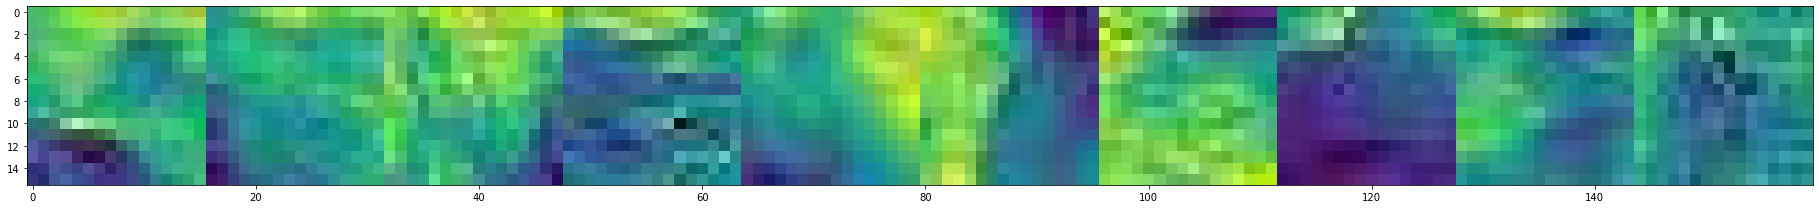

In [9]:
plot_images(images_lr_save[0:10])

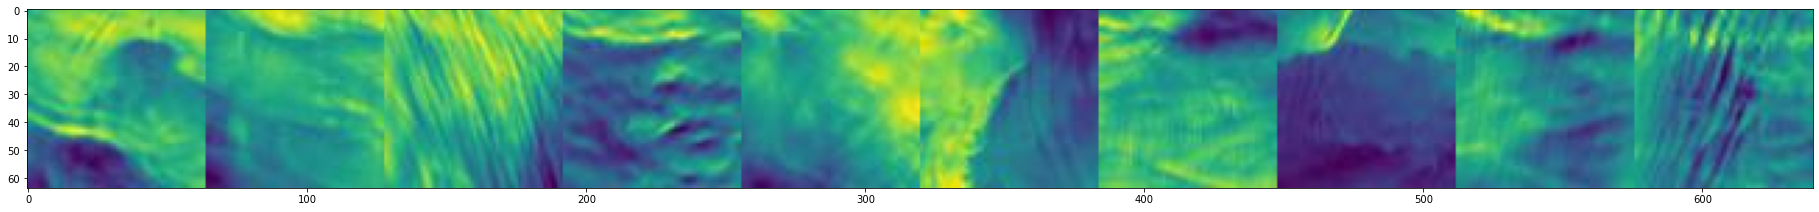

In [118]:
plot_images(images_hr_save[0:10])

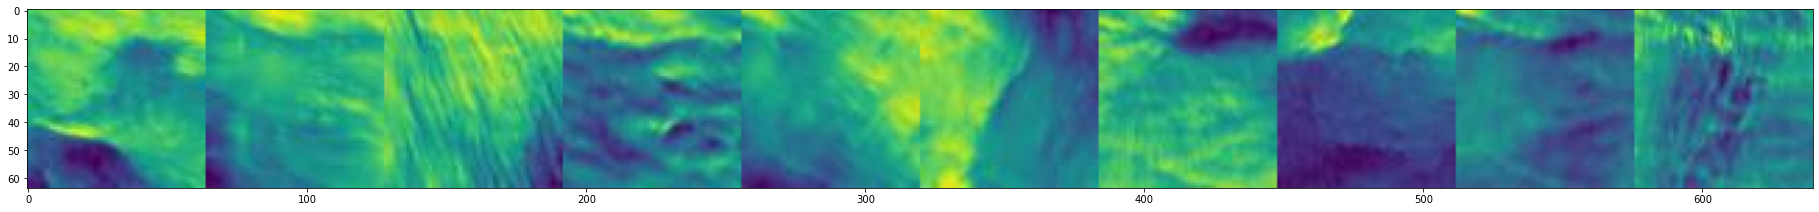

In [119]:
plot_images(images_gen_save[0:10])

In [77]:
images_lr.shape

torch.Size([2000, 3, 16, 16])

In [120]:
single_image = images_lr[1].repeat(images_lr.shape[0], 1, 1, 1)

In [121]:
single_image.shape

torch.Size([2000, 3, 16, 16])

In [122]:
d = dist(images_lr, single_image)

In [123]:
d

tensor([13.4009,  0.0000, 17.7983,  ..., 15.0034, 23.7182, 23.0422])

[ 141 1094  763 1807 1668  540  934 1824  501 1435  134 1388 1270 1876
  126 1770  242   67  657  449]


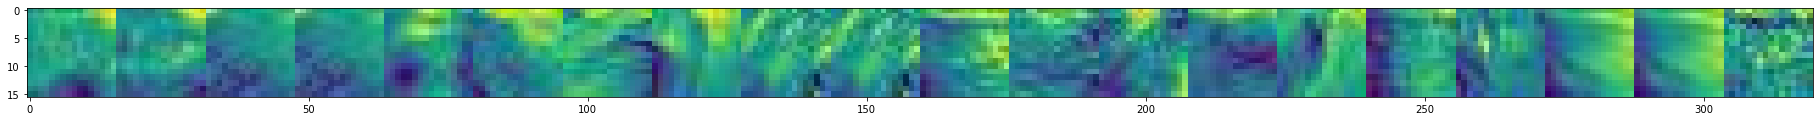

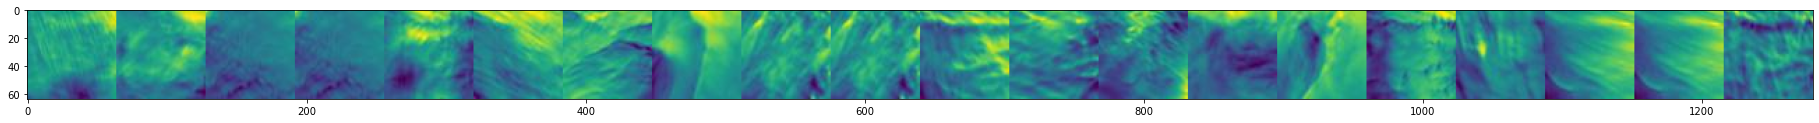

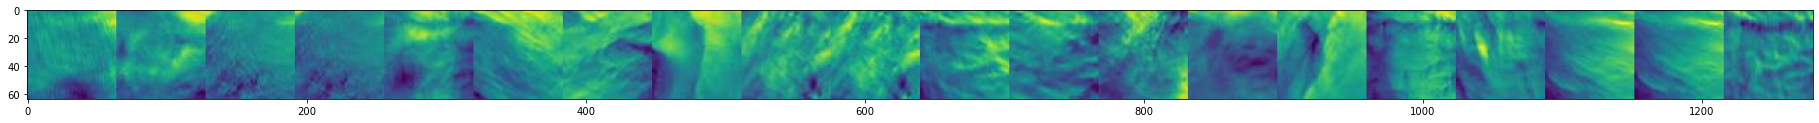

In [126]:
closest_indices = np.zeros(20, dtype = "int")
for i in range(20):
    closest_indices[i] = int(d.argmin())
    d[closest_indices[i]] = d.max()

print(closest_indices)
# plot_images(images_lr_save[0])
plot_images(images_lr_save[closest_indices])
plot_images(images_hr_save[closest_indices])
plot_images(images_gen_save[closest_indices])

In [130]:
neighbours_truth = images_hr[closest_indices]
neighbours_gen = images_gen[closest_indices]

In [133]:
torch.mean(neighbours_truth, dim = [0,1])

torch.Size([64, 64])

In [137]:
torch.sum(torch.mean(neighbours_truth, dim = [0,1]))

tensor(-676.1906)

In [139]:
torch.sum(torch.mean(neighbours_gen, dim = [0,1]))

tensor(-728.2695)

In [418]:
torch.mean(torch.var(neighbours_gen, dim = 0), dim = 0).shape

torch.Size([64, 64])

In [412]:
torch.sum(torch.var(neighbours_gen, dim = [0]), dim = 1).shape

torch.Size([3, 64])

In [140]:
torch.sum(torch.var(neighbours_truth, dim = [0,1]))

tensor(645.6146)

In [10]:
def find_neighbours(index, n_neighbours):
    single_image = images_lr[index].repeat(images_lr.shape[0], 1, 1, 1)
    d = dist(images_lr, single_image)
    closest_indices = np.zeros(n_neighbours, dtype = "int")
    for i in range(n_neighbours):
        closest_indices[i] = int(d.argmin())
        d[closest_indices[i]] = d.max()
    return closest_indices

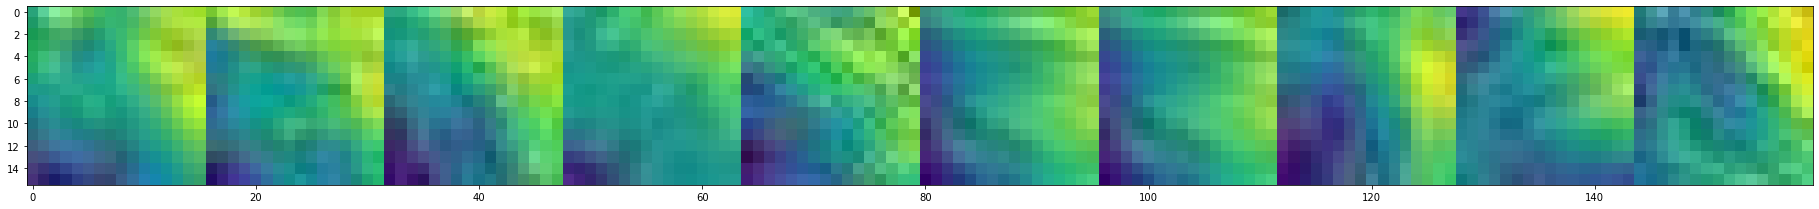

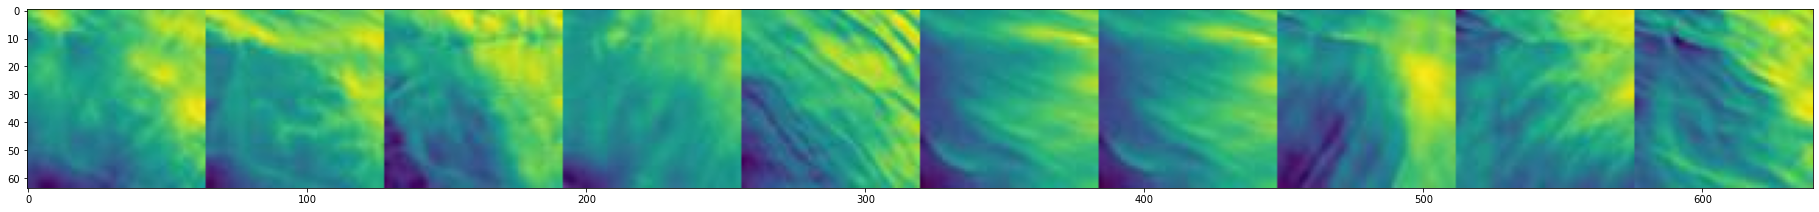

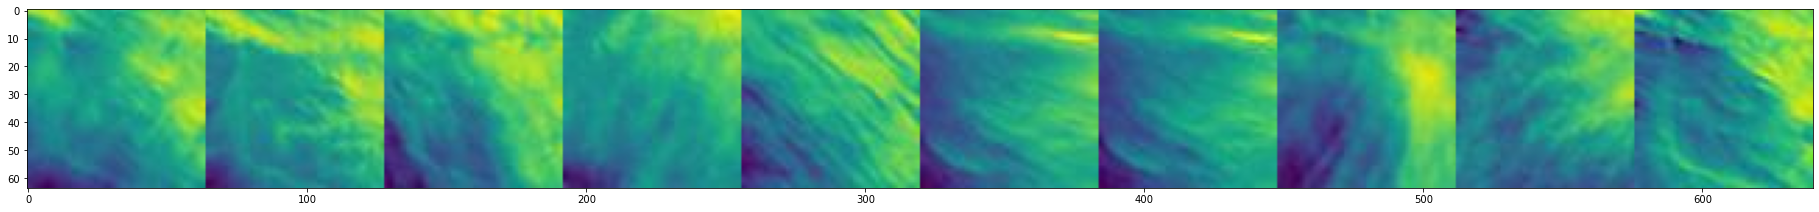

In [11]:
closest_indices = find_neighbours(4, 10)
plot_images(images_lr_save[closest_indices])
plot_images(images_hr_save[closest_indices])
plot_images(images_gen_save[closest_indices])
neighbours_truth = images_hr[closest_indices]
neighbours_gen = images_gen[closest_indices]

In [617]:
var_gen = np.empty((1, ), float)
var_truth = np.empty((1, ), float)
mean_gen = np.empty((1, ), float)
mean_truth = np.empty((1, ), float)
for i in range(0,2):
    print(i)
    closest_indices = find_neighbours(i, 10)
    print(closest_indices)
    neighbours_truth = images_hr[closest_indices]
    neighbours_gen = images_gen[closest_indices]
    var_truth = np.append(var_truth, np.array(torch.mean(torch.var(neighbours_truth, dim = 0), dim = 0).flatten()))
    print(var_truth)
    print(np.max(var_truth))
    var_gen = np.append(var_gen, np.array(torch.mean(torch.var(neighbours_gen, dim = 0), dim = 0).flatten()))
    mean_truth = np.append(mean_truth, np.array(torch.mean(torch.mean(neighbours_truth, dim = 0), dim = 0).flatten()))
    print(mean_truth)
    print(np.max(mean_truth))
    mean_gen = np.append(mean_gen, np.array(torch.mean(torch.mean(neighbours_gen, dim = 0), dim = 0).flatten()))

0
[   0  251 1740  837    1 1231 1927 1172 1298 1083]
[0.         0.1468028  0.14379451 ... 0.06543717 0.06884783 0.0643258 ]
0.17577879130840302
[ 0.17577879 -0.09045752 -0.08836599 ... -0.14980394 -0.15973856
 -0.1822222 ]
0.17577879130840302
1
[   1  251 1298 1529  113 1150  376 1714 1016  294]
[0.         0.1468028  0.14379451 ... 0.03257847 0.03608686 0.05226685]
0.17577879130840302
[ 0.17577879 -0.09045752 -0.08836599 ... -0.21490197 -0.20522876
 -0.2342484 ]
0.17577879130840302


In [489]:
var_truth

array([0.        , 0.1468028 , 0.14379451, ..., 0.025101  , 0.02911633,
       0.029297  ])

In [490]:
mean_truth

array([57.        , -0.09045752, -0.08836599, ..., -0.24836604,
       -0.25307193, -0.25803921])

In [531]:
closest_indices = find_neighbours(0, 10)
print(closest_indices)
neighbours_truth = images_hr[closest_indices]
neighbours_gen = images_gen[closest_indices]
print(np.max(np.array(torch.mean(torch.var(neighbours_truth, dim = 0), dim = 0).flatten())))
print(np.max(np.array(torch.mean(torch.mean(neighbours_truth, dim = 0), dim = 0).flatten())))

[   0  251 1740  837    1 1231 1927 1172 1298 1083]
0.17577879
0.13986929


In [664]:
var_gen = np.empty((1, ), float)
var_truth = np.empty((1, ), float)
var_bic = np.empty((1, ), float)
mean_gen = np.empty((1, ), float)
mean_truth = np.empty((1, ), float)
mean_bic = np.empty((1, ), float)
for i in range(1,1000):
    closest_indices = find_neighbours(i, 10)
    neighbours_truth = images_hr[closest_indices]
    neighbours_gen = images_gen[closest_indices]
    neighbours_bic = images_bicubic[closest_indices]
    var_truth = np.append(var_truth, np.array(torch.mean(torch.var(neighbours_truth, dim = 0), dim = 0).flatten()))
    var_gen = np.append(var_gen, np.array(torch.mean(torch.var(neighbours_gen, dim = 0), dim = 0).flatten()))
    var_bic = np.append(var_bic, np.array(torch.mean(torch.var(neighbours_bic, dim = 0), dim = 0).flatten()))
    mean_truth = np.append(mean_truth, np.array(torch.mean(torch.mean(neighbours_truth, dim = 0), dim = 0).flatten()))
    mean_gen = np.append(mean_gen, np.array(torch.mean(torch.mean(neighbours_gen, dim = 0), dim = 0).flatten()))
    mean_bic = np.append(mean_bic, np.array(torch.mean(torch.mean(neighbours_bic, dim = 0), dim = 0).flatten()))

In [665]:
var_truth

array([0.        , 0.0654055 , 0.07002777, ..., 0.025101  , 0.02911633,
       0.029297  ])

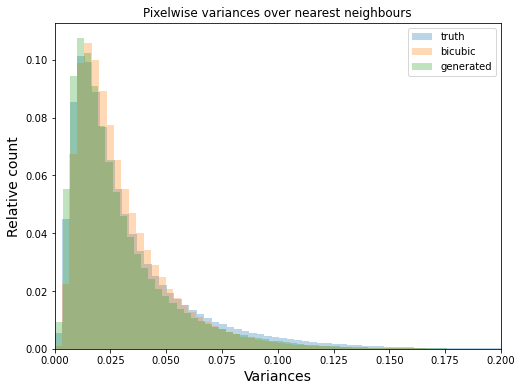

In [669]:
plt.figure(figsize=(8,6))
plt.hist(var_truth, bins=100, alpha=0.3, label="truth", weights=np.ones_like(var_truth) / len(var_truth))
plt.hist(var_bic, bins=100, alpha=0.3, label="bicubic", weights=np.ones_like(var_bic) / len(var_bic))
plt.hist(var_gen, bins=100, alpha=0.3, label="generated", weights=np.ones_like(var_gen) / len(var_gen))
plt.xlabel("Variances", size=14)
plt.xlim(0, 0.2)
plt.ylabel("Relative count", size=14)
plt.title("Pixelwise variances over nearest neighbours")
plt.legend(loc='upper right')
plt.savefig("pixelwise_variances.png")

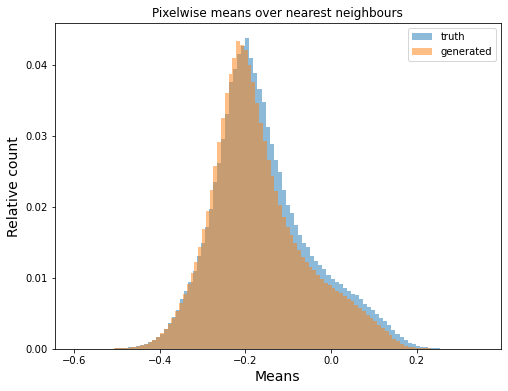

In [621]:
plt.figure(figsize=(8,6))
plt.hist(mean_truth, bins=100, alpha=0.5, label="truth", weights=np.ones_like(mean_truth) / len(mean_truth))
plt.hist(mean_gen, bins=100, alpha=0.5, label="generated", weights=np.ones_like(mean_gen) / len(mean_gen))
plt.xlabel("Means", size=14)
plt.ylabel("Relative count", size=14)
plt.title("Pixelwise means over nearest neighbours")
plt.legend(loc='upper right')
plt.savefig("pixelwise_means.png")

## No averaging over channels

In [18]:
var_gen = np.empty((1, ), float)
var_truth = np.empty((1, ), float)
var_bic = np.empty((1, ), float)
mean_gen = np.empty((1, ), float)
mean_truth = np.empty((1, ), float)
mean_bic = np.empty((1, ), float)
for i in range(1,1000):
    closest_indices = find_neighbours(i, 10)
    neighbours_truth = images_hr[closest_indices]
    neighbours_gen = images_gen[closest_indices]
    neighbours_bic = images_bicubic[closest_indices]
    var_truth = np.append(var_truth, np.array(torch.var(neighbours_truth, dim = 0).flatten()))
    var_gen = np.append(var_gen, np.array(torch.var(neighbours_gen, dim = 0).flatten()))
    var_bic = np.append(var_bic, np.array(torch.var(neighbours_bic, dim = 0).flatten()))
    mean_truth = np.append(mean_truth, np.array(torch.mean(neighbours_truth, dim = 0).flatten()))
    mean_gen = np.append(mean_gen, np.array(torch.mean(neighbours_gen, dim = 0).flatten()))
    mean_bic = np.append(mean_bic, np.array(torch.mean(neighbours_bic, dim = 0).flatten()))

In [19]:
var_truth

array([1.        , 0.07531121, 0.09088881, ..., 0.00597992, 0.00760323,
       0.00762852])

In [20]:
var_truth = var_truth[1:]
var_gen = var_gen[1:]
var_bic = var_bic[1:]

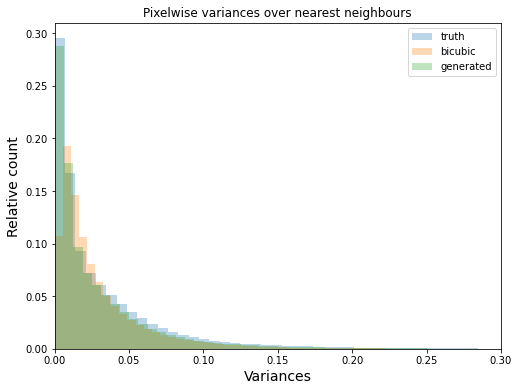

In [22]:
plt.figure(figsize=(8,6))
plt.hist(var_truth, bins=100, alpha=0.3, label="truth", weights=np.ones_like(var_truth) / len(var_truth))
plt.hist(var_bic, bins=100, alpha=0.3, label="bicubic", weights=np.ones_like(var_bic) / len(var_bic))
plt.hist(var_gen, bins=100, alpha=0.3, label="generated", weights=np.ones_like(var_gen) / len(var_gen))
plt.xlim(0, 0.3)
plt.xlabel("Variances", size=14)
plt.ylabel("Relative count", size=14)
plt.title("Pixelwise variances over nearest neighbours")
plt.legend(loc='upper right')
plt.savefig("pixelwise_variances.png")

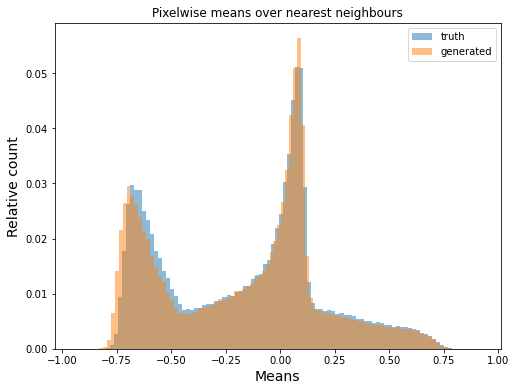

In [23]:
plt.figure(figsize=(8,6))
plt.hist(mean_truth, bins=100, alpha=0.5, label="truth", weights=np.ones_like(mean_truth) / len(mean_truth))
plt.hist(mean_gen, bins=100, alpha=0.5, label="generated", weights=np.ones_like(mean_gen) / len(mean_gen))
plt.xlabel("Means", size=14)
plt.ylabel("Relative count", size=14)
plt.title("Pixelwise means over nearest neighbours")
plt.legend(loc='upper right')
plt.savefig("pixelwise_means.png")

## Try NN with all low-res

In [6]:
path_lr = "/scratch/users/mschillinger/Documents/DL-project/WiSoSuper/train/wind/middle_patch/LR"
# path_gen = "./testdata/Testing_v2_fixeddata/Image_test_generated"
# path_hr = "./testdata/Testing_v2_fixeddata/Image_test_truth"

n_example_imgs = 1999
files = sorted(os.listdir(path_lr))
# files_hr = sorted(os.listdir(path_hr))
# files_gen = sorted(os.listdir(path_gen))

first_file = files[0]
path =  os.path.join(path_lr, first_file)
images_lr = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)

# first_file = files_hr[0]
# path =  os.path.join(path_hr, first_file)
# images_hr = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)

# first_file = files_gen[0]
# path =  os.path.join(path_gen, first_file)
# images_gen = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)

for i in range(n_example_imgs):
    file = files[i + 1]
    print(file)
    path =  os.path.join(path_lr, file)
    img = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)
    images_lr = torch.cat([images_lr, img], dim=0)
    
#     file = files_hr[i + 1]
#     print(file)
#     path =  os.path.join(path_hr, file)
#     img = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)
#     images_hr = torch.cat([images_hr, img], dim=0)
    
#     file = files_gen[i + 1]
#     print(file)
#     path =  os.path.join(path_gen, file)
#     img = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)
#     images_gen = torch.cat([images_gen, img], dim=0)
    
   
norm = 255 / 2.0
transform_lr = T.Compose([
    T.CenterCrop((args.image_size // args.resolution_ratio, args.image_size // args.resolution_ratio)),
    T.Normalize((norm, norm, norm), (norm, norm, norm))
    ])
images_lr_save = images_lr
images_lr = transform_lr(images_lr.float())

# transform_hr = T.Compose([
#     T.CenterCrop((args.image_size , args.image_size)),
#     T.Normalize((norm, norm, norm), (norm, norm, norm))
#     ])

# images_hr_save = images_hr
# images_hr = transform_hr(images_hr.float())

# images_gen_save = images_gen
# images_gen = transform_hr(images_gen.float())

# images_bicubic = F.interpolate(images_lr.float(), size = [images_hr.shape[-1], images_hr.shape[-2]], mode = "bicubic")
# images_bicubic = images_bicubic.clamp(-1, 1)
# images_bicubic_save =  (images_bicubic + 1) / 2.0 * 255
# images_bicubic_save = images_bicubic_save.type(torch.uint8)

ua_100.png
ua_1000.png
ua_10000.png
ua_10004.png
ua_10008.png
ua_10012.png
ua_10016.png
ua_10020.png
ua_10024.png
ua_10028.png
ua_10032.png
ua_10036.png
ua_1004.png
ua_10040.png
ua_10044.png
ua_10048.png
ua_10052.png
ua_10056.png
ua_10060.png
ua_10064.png
ua_10068.png
ua_10072.png
ua_10076.png
ua_1008.png
ua_10080.png
ua_10084.png
ua_10088.png
ua_10092.png
ua_10096.png
ua_10100.png
ua_10104.png
ua_10108.png
ua_10112.png
ua_10116.png
ua_1012.png
ua_10120.png
ua_10124.png
ua_10128.png
ua_10132.png
ua_10136.png
ua_10140.png
ua_10144.png
ua_10148.png
ua_10152.png
ua_10156.png
ua_1016.png
ua_10160.png
ua_10164.png
ua_10168.png
ua_10172.png
ua_10176.png
ua_10180.png
ua_10184.png
ua_10188.png
ua_10192.png
ua_10196.png
ua_1020.png
ua_10200.png
ua_10204.png
ua_10208.png
ua_10212.png
ua_10216.png
ua_10220.png
ua_10224.png
ua_10228.png
ua_10232.png
ua_10236.png
ua_1024.png
ua_10240.png
ua_10244.png
ua_10248.png
ua_10252.png
ua_10256.png
ua_10260.png
ua_10264.png
ua_10268.png
ua_10272.png
ua_10276

ua_14756.png
ua_1476.png
ua_14760.png
ua_14764.png
ua_14768.png
ua_14772.png
ua_14776.png
ua_14780.png
ua_14784.png
ua_14788.png
ua_14792.png
ua_14796.png
ua_148.png
ua_1480.png
ua_14800.png
ua_14804.png
ua_14808.png
ua_14812.png
ua_14816.png
ua_14820.png
ua_14824.png
ua_14828.png
ua_14832.png
ua_14836.png
ua_1484.png
ua_14840.png
ua_14844.png
ua_14848.png
ua_14852.png
ua_14856.png
ua_14860.png
ua_14864.png
ua_14868.png
ua_14872.png
ua_14876.png
ua_1488.png
ua_14880.png
ua_14884.png
ua_14888.png
ua_14892.png
ua_14896.png
ua_14900.png
ua_14904.png
ua_14908.png
ua_14912.png
ua_14916.png
ua_1492.png
ua_14920.png
ua_14924.png
ua_14928.png
ua_14932.png
ua_14936.png
ua_14940.png
ua_14944.png
ua_14948.png
ua_14952.png
ua_14956.png
ua_1496.png
ua_14960.png
ua_14964.png
ua_14968.png
ua_14972.png
ua_14976.png
ua_14980.png
ua_14984.png
ua_14988.png
ua_14992.png
ua_14996.png
ua_1500.png
ua_15000.png
ua_15004.png
ua_15008.png
ua_15012.png
ua_15016.png
ua_15020.png
ua_15024.png
ua_15028.png
ua_15032

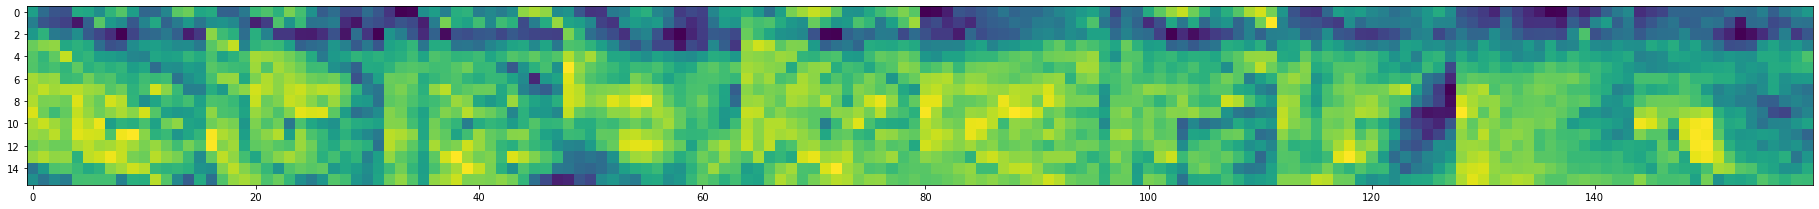

In [12]:
closest_indices = find_neighbours(0, 10)
plot_images(images_lr_save[closest_indices])

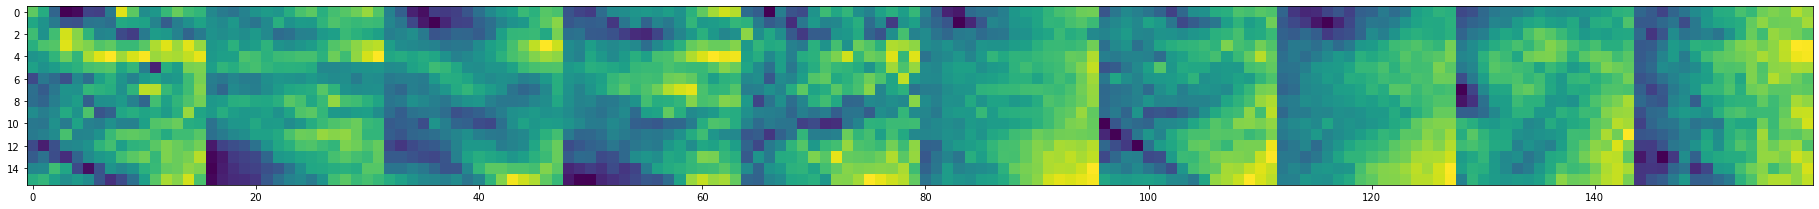

In [13]:
closest_indices = find_neighbours(4, 10)
plot_images(images_lr_save[closest_indices])